In [1]:
import theano.tensor as T
from theano import function

Using gpu device 0: GeForce GT 750M


In [471]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import gridspec as gs
import numpy as np

In [2]:
x = T.dscalar('x')
y = T.dscalar('y')
z = x + y

f = function([x, y], z)

In [3]:
f

In [4]:
f(2,3)

array(5.0)

In [5]:
type(x)

theano.tensor.var.TensorVariable

In [6]:
x.type

TensorType(float64, scalar)

In [7]:
T.dscalar

TensorType(float64, scalar)

In [8]:
from theano import pp

print pp(z)

(x + y)


In [9]:
import numpy as np

x = T.dmatrix('x')
y = T.dmatrix('y')
z = x * y
f = function([x, y], z)

f(np.full((2, 3), 3, dtype=np.float64), np.full((2, 3), 2, dtype=np.float64))

array([[ 6.,  6.,  6.],
       [ 6.,  6.,  6.]])

In [10]:
x = T.dmatrix('x')
s = T.sum(1 / (1 + T.exp(-x)))
gs = T.grad(s, x)

dlogistic = function([x], gs)
dlogistic([[0, 1], [-1, -2]])

array([[ 0.25      ,  0.19661193],
       [ 0.19661193,  0.10499359]])

In [25]:
import theano.tensor.signal.conv.conv2d

x = T.dmatrix()
y = T.dmatrix()
veclen = x.shape[1]

conv1d_expr = conv2d(x, y, image_shape=(1, veclen), border_mode='full')

conv1d = theano.function([x, y], outputs=conv1d_expr)

ImportError: No module named conv2d

In [28]:
c(np.ones((3,3)), np.full((3,3), 2))

array(2.0)

In [40]:
x = T.dscalar('x')
w = T.dscalar('w')
t = T.dscalar('t')

y = x * w
c = .5 * (y - t) ** 2
forward = function([x, w], y)
cost = function([x, w, t], c)

print pp(c)

(TensorConstant{0.5} * (((x * w) - t) ** TensorConstant{2}))


In [46]:
myw = 2.0

myx = 2.0
myt = 3.0

In [59]:
print 'output', forward(myx, myw)
print 'cost', cost(myx, myw, myt)

dcost = T.grad(c, w)
df = function([x, w, t], dcost)
print 'dcost', dcost

output 4.0
cost 0.5
dcost Elemwise{mul}.0


In [202]:
dcdw = df(myx, myw, myt)
myw += .1 * dcdw
print 'dcdw', dcdw, 'output', forward(myx, myw), 'cost', cost(myx, myw, myt)

dcdw 93.599552573 output 65.5196868011 cost 2146.41467926


In [168]:
myt = 0

In [347]:
x = T.dscalar('x')
w = T.dmatrix('w')
t = T.dmatrix('t')
y = x*w
forward = function([x, w], y)
cost = T.sum(.5 * (y - t) ** 2)
dcdw = T.grad(cost, [w])
dcdwF = function([x, w, t], dcdw)
costF = function([x, w, t], cost)

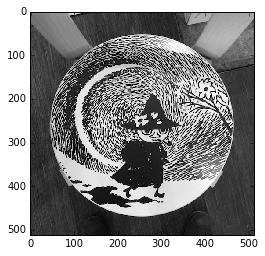

In [459]:
#DIM = 1000
#myt = np.asarray([[np.sin(x/5.0) * np.cos(y/5.0 * np.sin(x)) for x in xrange(DIM)] for y in xrange(DIM)])
myt = plt.imread('../datasets/witch.png')[:,:,0]

myw = np.random.random_sample(myt.shape)
plt.imshow(myt, cmap=plt.cm.gray, interpolation='nearest')

cost 2.6554749355e-27


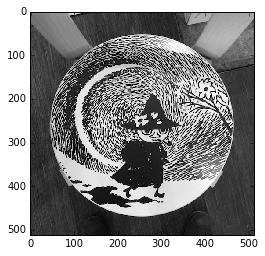

In [467]:
for __ in xrange(100):
    myw -=  .2 * dcdwF(1.0, myw, myt)[0]

out = forward(1.0, myw)
plt.imshow(out, cmap=plt.cm.gray, interpolation='nearest')
print 'cost', costF(1.0, myw, myt)

In [490]:
x = T.dmatrix('x')
w = T.dmatrix('w')
t = T.dmatrix('t')
y = x * w
fy = function([x, w], y)
c = T.sum((y - t)**2)
fc = function([x, w, t], c)

dcdw = T.grad(c, [w])
fdcdw = function([x, w, t], dcdw)

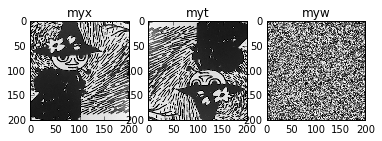

In [535]:
import scipy

img = plt.imread('../datasets/witch.png')
myx = img[200:400, 200:400, 0]
myt = scipy.ndimage.interpolation.rotate(myx, 180.0, (0, 0), reshape=False, mode='reflect')
myw = np.random.random_sample(myt.shape)

g = gs.GridSpec(1, 3)
plt.subplot(g[0, 0])
plt.title('myx')
plt.imshow(myx, cmap=plt.cm.gray, interpolation='nearest')
plt.subplot(g[0, 1])
plt.title('myt')
plt.imshow(myt, cmap=plt.cm.gray, interpolation='nearest')
plt.subplot(g[0, 2])
plt.title('myw')
plt.imshow(myw, cmap=plt.cm.gray, interpolation='nearest')

cost 905.465419445


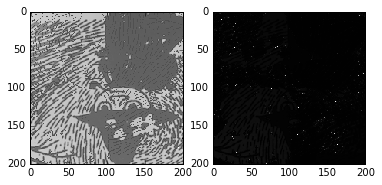

In [541]:
from IPython.display import clear_output

for i in xrange(10000):
    myw -= 1.0 * fdcdw(myx, myw, myt)[0]
    
    if i % 1000==0:
        newout = fy(myx, myw)
        clear_output(wait=True)
        print 'cost', fc(myx, myw, myt)

        g = gs.GridSpec(1, 2)
        plt.subplot(g[0,0])
        plt.imshow(newout, cmap=plt.cm.gray, interpolation='nearest')
        plt.subplot(g[0,1])
        plt.imshow(myw, cmap=plt.cm.gray, interpolation='nearest')
        plt.show()

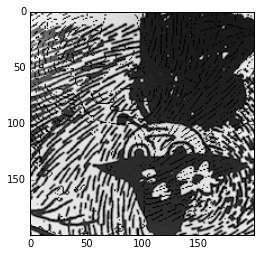

In [553]:
plt.imshow(myx * myw, cmap=plt.cm.gray)